In [2]:
%load_ext autoreload
%autoreload 
import matplotlib.pyplot as plt
import csv

In [3]:
b_losses = []
d_losses = []

with open('/home/lcur1339/dl2-cgn/cgn_framework/imagenet/experiments/bgn_2022_05_29_13_02_tmp/losses/losses.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for i, row in enumerate(lines):
        if i == 0: b_losses = row[1:]
        else: d_losses = row[1:]


In [4]:
b_losses = [round(float(elem), 3) for elem in b_losses ]
d_losses = [round(float(elem), 3) for elem in d_losses]
print(b_losses[:10])

[0.327, 0.648, 0.339, 1.006, 1.347, 0.276, 0.095, 0.641, 0.489, 0.319]


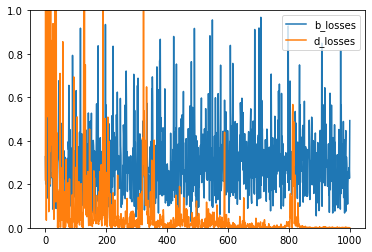

In [6]:
plt.plot(b_losses[::10], label='b_losses')
plt.plot(d_losses[::10], label='d_losses')
#plt.plot(d_losses, label='d_losses')
ax = plt.gca()
ax.set_ylim([0,1])
plt.legend()
plt.show()

In [2]:
from imagenet.models import CGN
from imagenet.models.gp_gan import BlendNet

In [3]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import torchvision

In [4]:
cgn = CGN(1)
weights = torch.load("/home/lcur1339/dl2-cgn/cgn_framework/imagenet/weights/cgn.pth", map_location=torch.device('cpu'))
weights = {k.replace('module.', ''): v for k, v in weights.items()}
cgn.load_state_dict(weights)

<All keys matched successfully>

In [5]:
x_gt, mask, _, foreground, background, _ = cgn()
img_comp = mask * foreground + (1 - mask) * background

: 

: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Mask')

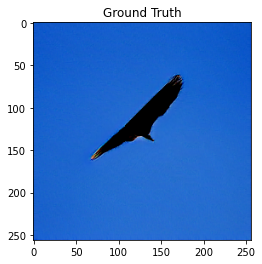

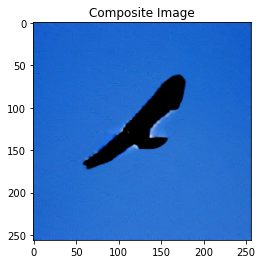

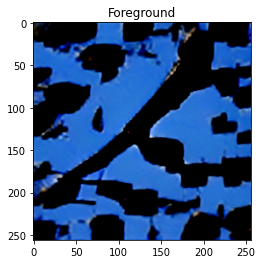

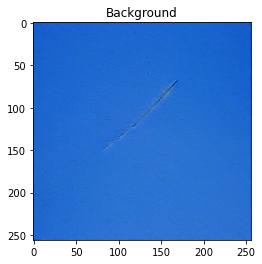

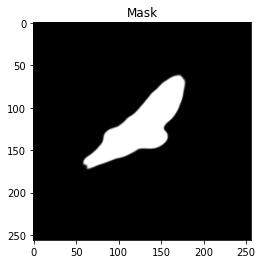

In [ ]:
# printing the results
plt.imshow(x_gt.detach().squeeze(0).transpose(1,0).transpose(2,1))
plt.title('Ground Truth')
plt.figure()
plt.imshow(img_comp.detach().squeeze(0).transpose(1,0).transpose(2,1))
plt.title('Composite Image')
plt.figure()
plt.imshow(foreground.detach().squeeze(0).transpose(1,0).transpose(2,1))
plt.title('Foreground')
plt.figure()
plt.imshow(background.detach().squeeze(0).transpose(1,0).transpose(2,1))
plt.title('Background')
plt.figure()
plt.imshow(mask.detach().squeeze(), cmap='gray')
plt.title('Mask') 



In [ ]:
# loading the blend net
model = BlendNet()

PATH = "/home/lcur1339/dl2-cgn/cgn_framework/imagenet/weights/blend_net_weights" 
model.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))

<All keys matched successfully>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


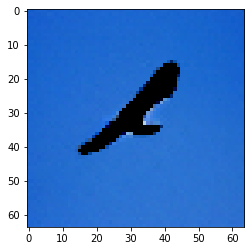

In [ ]:
# model expects 64x64 imgs so resize...
img_resz = torchvision.transforms.functional.resize(img_comp, size=(64,64))
plt.imshow(img_resz.squeeze(0).detach().numpy().transpose(1,2,0))

In [ ]:
print(img_resz.max())
print(img_resz.min())

NameError: name 'img_resz' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 64, 64])


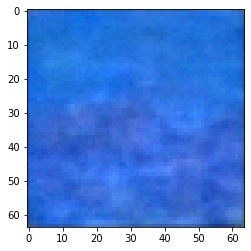

In [ ]:
model.eval()
xl_from_net = model(img_resz)#.squeeze(0))
print(xl_from_net.size())
plt.imshow(xl_from_net.detach().squeeze(0).numpy().transpose(1,2,0))
print(xl_from_net.max())
print(xl_from_net.min())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


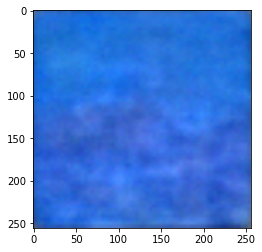

In [10]:
xl = torchvision.transforms.functional.resize(xl_from_net, size=(256,256))
plt.imshow(xl.detach().squeeze(0).numpy().transpose(1,2,0))

In [11]:
from imagenet.train_bgan import save_sample_sheet

save_sample_sheet(model, cgn, "/home/lcur1339/dl2-cgn/cgn_framework/imagenet/experiments", '0')
